<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng04/A04_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.stats import norm
from numpy import mean
from numpy import std

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


------start of a [Question 1]------

In [ ]:
train_data, test_data = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx",0), pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx",1)

In [ ]:
train_data.head()

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,Apartment


Answer to question 1:

As we can see from the data, some inputs have continuous nature, some are discrete.


I will assume that following features are discrete:


-Bathrooms


-Garages


-Bedrooms


Rest features will be traited as continuous and their distribution will be presented as Gaussian one with corresponding means and variances.

In [ ]:
train_data["Bathrooms"].unique()

array([1. , 2.5, 1.5])

In [ ]:
train_data["# Garages"].unique()

array([1. , 2. , 0. , 1.5])

In [ ]:
train_data["# Bedrooms"].unique()

array([4, 3, 5, 2], dtype=int64)

So, my estimated probability distributions will be following:

(A - Apartment, C - Condo, H - House)

For discrete values:
![image-6.png](attachment:image-6.png)
For continuous values:
![image-5.png](attachment:image-5.png)

All values was calculated using Excel:

![image.png](attachment:image.png)

![image.png](attachment:image.png)

For discrete values as it showed on formulas above I calculated conditional probability for every ocurrence of features in condition of each possible class.

Answer to question 2:

Initially, let's hardcode conditional probabilities from the previous step

In [ ]:
# probability for each class
P = {
"A":0.35,
"C":0.3,
"H":0.35}

In [ ]:
bathrooms= {
"A":
{1: 0.714285714,
1.5:0.142857143,
2.5:0.142857143},
"C":
{1 :0.666666667,
1.5:0.166666667,
2.5:0.166666667},
"H":
{1 :0.857142857,
1.5:0.142857143,
2.5:0}}


In [ ]:
garages = {
"A":
{0:0.142857143,
1:0.428571429,
1.5:0.142857143,
2:0.285714286},
"C":
{0:0,
1:0.666666667,
1.5:0,
2:0.333333333},
"H":
{0:0.285714286,
1:0.285714286,
1.5:0.142857143,
2:0.285714286}}

bedrooms = {
"A":
{2:0.142857143,
3:0.428571429,
4:0.285714286,
5:0.142857143},
"C":
{2:0,
3:0.833333333,
4:0,
5:0.166666667},
"H":
{2:0.142857143,
3:0.714285714,
4:0.142857143,
5:0}}

lcl_price = {
"A":    
[7.332742857,
3.615997235],
"C":
[7.4159,
4.611247858],
"H":
[5.760742857,
0.57012127]}

land_area = {
"A": 
[6.103857143,
3.258509497],
"C":
[6.024666667,
2.544777371],
"H":
[6.6309,
2.248973218]}

lvng_area = {
"A":    
[1.505,
0.704105816],
"C":
[1.553333333,
0.923441317],
"H":
[1.391714286,
0.212923863]}


rooms = {
"A": 
[6.857142857,
1.345185418],
"C":
[6.833333333,
1.602081979],
"H":
[6.142857143,
0.690065559]}
age = {
"A": 
[38.71428571,
14.68235092],
"C":
[39.66666667,
13.95229969],
"H":
[34.28571429,
12.72418021]}

In [ ]:
test_data.iloc[0]

House ID                    24
Local Price             6.0931
Bathrooms                  1.5
Land Area               6.7265
Living area              1.652
# Garages                  1.0
# Rooms                      6
# Bedrooms                   3
Age of home                 44
Construction type    Apartment
Name: 0, dtype: object

After looking to test data I can compose function for computing probability for each example.

In [ ]:
#features from specific dataset, others could work inproperly
def compute_probability(category, features): 
    cond_prob_comp = [
     norm.pdf(features[1], lcl_price[category][0], lcl_price[category][1]),
     bathrooms[category][features[2]],
     norm.pdf(features[3], land_area[category][0], land_area[category][1]),
     norm.pdf(features[4], lvng_area[category][0], lvng_area[category][1]),
     garages[category][features[5]],
     norm.pdf(features[6], rooms[category][0], rooms[category][1]),
     bedrooms[category][features[7]],
     norm.pdf(features[8], age[category][0], age[category][1])
    ]
    return np.prod(cond_prob_comp)*P[category] #final probability

In [ ]:
def prediction(features):
    list_categories = ["Apartment","Condo","House"]
    pred=[
        compute_probability("A",features),
        compute_probability("C",features),
        compute_probability("H",features)]
    print(f'Probability that our instance is:\n Apartment: {pred[0]}.\n Condo: {pred[1]}. \n House: {pred[2]}.')
    
    result = list_categories[np.argmax(pred)]
    print(f'Using MAP rule we can assign our sample to {result} with {max(pred)} probability' )
    return result, max(pred)

In [ ]:
model_result = np.empty(len(test_data), dtype=object)
for i in range(len(test_data)):
    print(f"Calculating output for {i+1} data row")
    model_result[i], _ =prediction(test_data.iloc[i])
    print()

Calculating output for 1 data row
Probability that our instance is:
 Apartment: 3.925382009337959e-07.
 Condo: 8.860874590265127e-07. 
 House: 1.2562454324323035e-05.
Using MAP rule we can assign our sample to House with 1.2562454324323035e-05 probability

Calculating output for 2 data row
Probability that our instance is:
 Apartment: 8.271977899596267e-08.
 Condo: 0.0. 
 House: 4.075748480966739e-13.
Using MAP rule we can assign our sample to Apartment with 8.271977899596267e-08 probability

Calculating output for 3 data row
Probability that our instance is:
 Apartment: 8.023204472188723e-08.
 Condo: 5.323568543763167e-08. 
 House: 6.938889468363851e-10.
Using MAP rule we can assign our sample to Apartment with 8.023204472188723e-08 probability

Calculating output for 4 data row
Probability that our instance is:
 Apartment: 5.646304060505699e-08.
 Condo: 0.0. 
 House: 2.91891982307598e-16.
Using MAP rule we can assign our sample to Apartment with 5.646304060505699e-08 probability

Cal

-------------------end of [Question 1]-----------------

-------------------start of [Question 2]-----------------

Before I train my model I will drop unnecesary feature called "House ID" and prepare data for fitting inside model

In [ ]:
train_data.head()

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,4.9176,1.0,3.472,0.998,1.0,7,4,42,Apartment
1,5.0208,1.0,3.531,1.500,2.0,7,4,62,House
2,4.5429,1.0,2.275,1.175,1.0,6,3,40,Condo
3,4.5573,1.0,4.050,1.232,1.0,6,3,54,Apartment
4,5.0597,1.0,4.455,1.121,1.0,6,3,42,Apartment


In [ ]:
train_data = train_data.drop(columns='House ID')
test_data = test_data.drop(columns='House ID')

In [ ]:
features_names = train_data.columns[:8]

In [ ]:
x_train = train_data.values[:,:8]
y_train = train_data.values[:,8]
x_test = test_data.values[:,:8]
y_test = test_data.values[:,8]

Answer to question 1:

In [ ]:
contype_predictor=DecisionTreeClassifier()

In [ ]:
model = contype_predictor.fit(x_train,y_train)
y_training = contype_predictor.predict(x_train)
y_prediction = contype_predictor.predict(x_test)


Answer to question 1a:

In [ ]:
accuracy_score(y_train,y_training)

1.0

Answer to question 1b:

In [ ]:
accuracy_score(y_test,y_prediction)

0.4

Answer to question 2:

Main effect of restricting the maximum depth is preventing a model from overfitting.


Let's create 4 different tree classifiers based on possible depths and compute their accuracy on testing data.

In [ ]:
contype_predictor_1=DecisionTreeClassifier(
    max_depth=1
)
contype_predictor_2=DecisionTreeClassifier(
    max_depth=2
)
contype_predictor_3=DecisionTreeClassifier(
    max_depth=3
)
contype_predictor_4=DecisionTreeClassifier(
    max_depth=4
)

In [ ]:
contype_predictor_1.fit(x_train,y_train)
contype_predictor_2.fit(x_train,y_train)
contype_predictor_3.fit(x_train,y_train)
contype_predictor_4.fit(x_train,y_train)
y_prediction = contype_predictor_1.predict(x_test)
print("Accuracy of the tree with maximum depth of 1 is:")
accuracy_score(y_test,y_prediction)


Accuracy of the tree with maximum depth of 1 is:


0.4

In [ ]:
y_prediction = contype_predictor_2.predict(x_test)
print("Accuracy of the tree with maximum depth of 2 is:")
accuracy_score(y_test,y_prediction)


Accuracy of the tree with maximum depth of 2 is:


0.8

In [ ]:
contype_predictor_3.fit(x_train,y_train)
y_prediction = contype_predictor_3.predict(x_test)
print("Accuracy of the tree with maximum depth of 3 is:")
accuracy_score(y_test,y_prediction)

Accuracy of the tree with maximum depth of 3 is:


0.4

In [ ]:
contype_predictor_4.fit(x_train,y_train)
y_prediction = contype_predictor_4.predict(x_test)
print("Accuracy of the tree with maximum depth of 4 is:")
accuracy_score(y_test,y_prediction)

Accuracy of the tree with maximum depth of 4 is:


0.4

Thus, best value which could be achieved is 0.8 accuracy. By the way, this value appears not always and depends on criterion.

Answer to question 3:

Depth restriction have such strong effect on model perfomance since it make less constraints for assigning to wrong category. Thus, tree becomes "softer".

Answer to question 4:

I will use model with best accuracy.

In [ ]:
best_model = contype_predictor_2.fit(x_train,y_train)

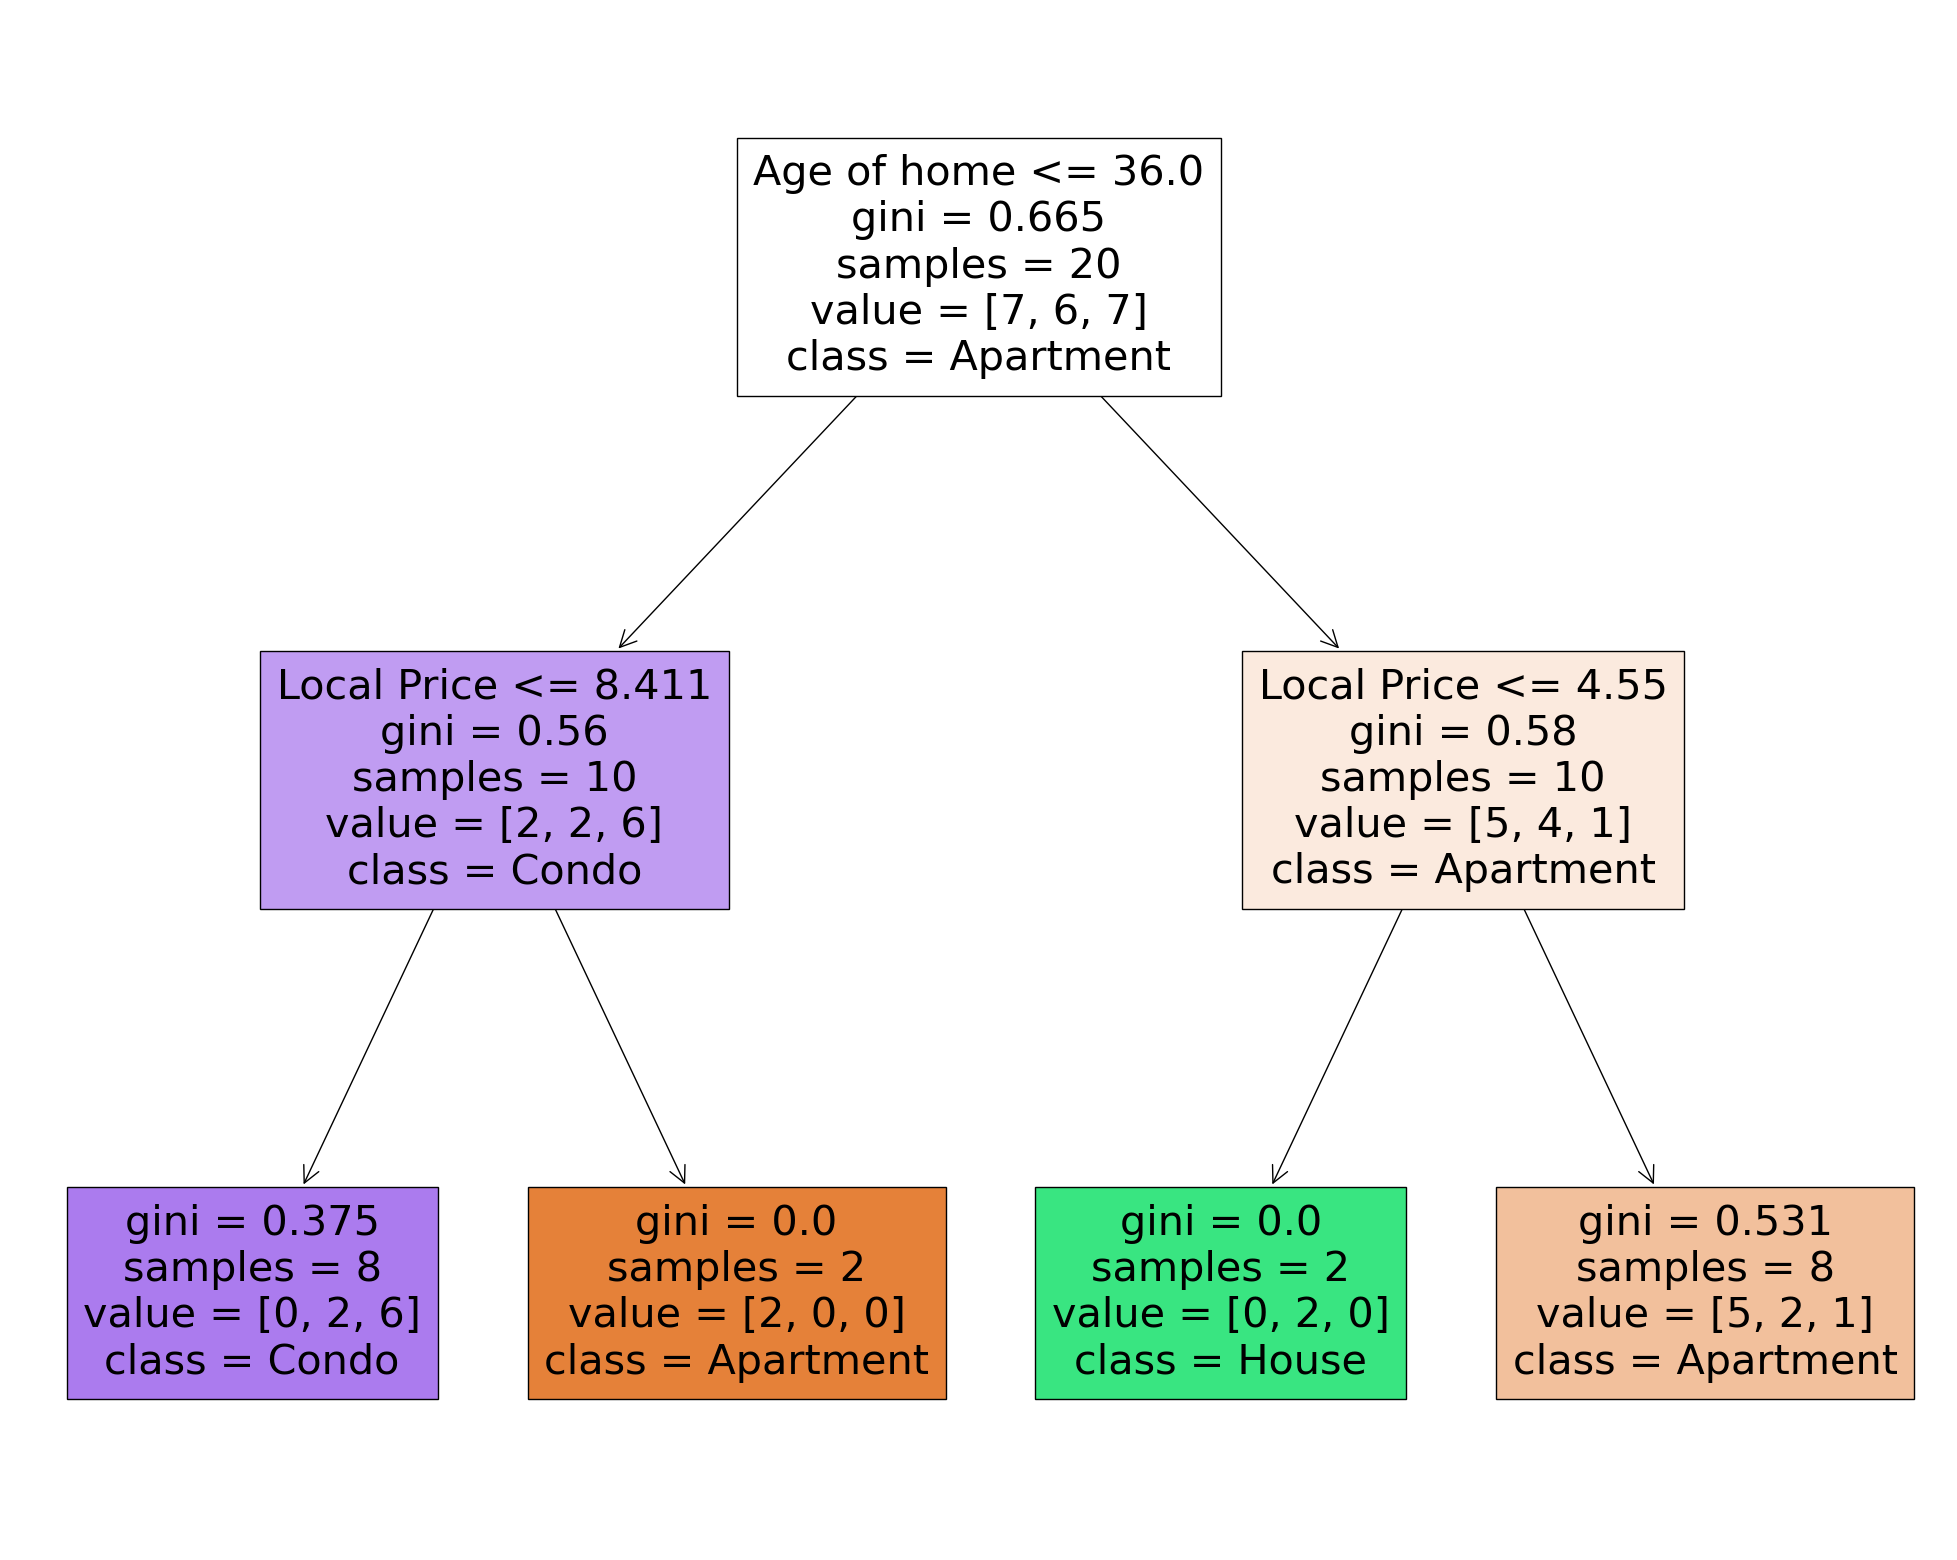

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model, 
                   feature_names=features_names,  
                   class_names=y_train,
                   filled=True)

Now I will put here the same tree but with trace towards classification.

![image.png](attachment:image.png)

-------------------end of [Question 2]-----------------

-------------------start of [Question 3]-----------------

My own implementation of KNN estimator with k input:

In [ ]:
def estimate_output_knn(x,y,test_example,k):
    #computing euclidean distance between testing sample and every training sample
    distances = np.linalg.norm(np.float64(x) - np.float64(test_example), axis=1)
    #getting arguments for sorted by ascending distances and finding k nearest neighbors
    nn_idx = distances.argsort()[:k]
    nn_type = y[nn_idx]
    #print(nn_type)
    #to use majority vote we will use mode() method
    result = pd.DataFrame(nn_type).mode()
    #print(f'Output with {k} neighborhoods is {result[0][0]}')
    return result[0][0]


Now I can compute accuracy for different number of neghbors.

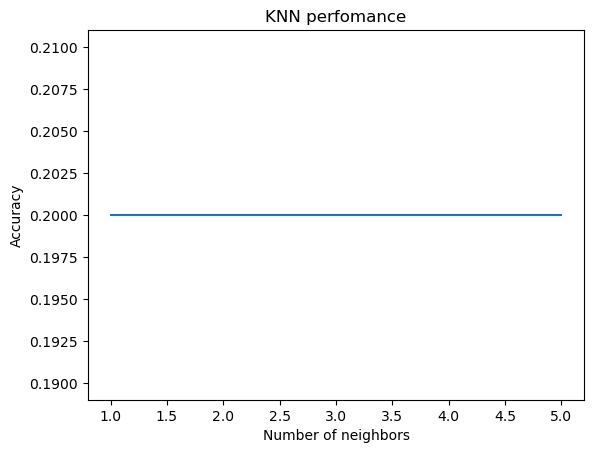

In [ ]:
n_of_n_to_test=5
acc_plot = np.empty(len(range(n_of_n_to_test)))
for n_n in range(n_of_n_to_test):
    resulting_prediction = np.empty(len(test_data), dtype=object)
    for i in range(len(test_data)):
        resulting_prediction[i] = estimate_output_knn(x_train,y_train,x_test[i],n_n+1)
    acc_plot[n_n] = accuracy_score(y_test,resulting_prediction)   
x_ticks = np.arange(1,n_of_n_to_test+1)
plt.title("KNN perfomance")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.plot(x_ticks,acc_plot);   
    

It seems that perfomance do not improving but it should. Let's check perfomance of my model by trying more neighbors.

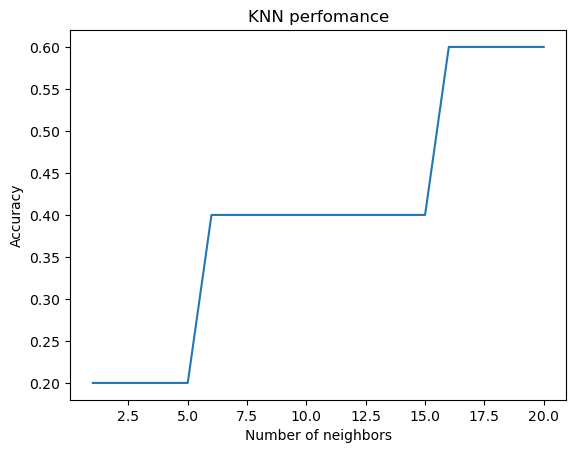

In [ ]:
n_of_n_to_test=20
acc_plot = np.empty(len(range(n_of_n_to_test)))
for n_n in range(n_of_n_to_test):
    resulting_prediction = np.empty(len(test_data), dtype=object)
    for i in range(len(test_data)):
        resulting_prediction[i] = estimate_output_knn(x_train,y_train,x_test[i],n_n+1)
    acc_plot[n_n] = accuracy_score(y_test,resulting_prediction)   
x_ticks = np.arange(1,n_of_n_to_test+1)
plt.title("KNN perfomance")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.plot(x_ticks,acc_plot);   

Now we see that accuracy is improving starting from 6 numbers of neighbors. My suggestion that we have a very poor data so we should use all the distances to get at least 60% accuracy and choose category by majority rule.

-------------------end of [Question 3]-----------------